In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os
import itertools

# Data import

In [2]:
# IMPORTED OR DATASET GENERATED LAST?
use_import = True

# gets the last created filename (which is the latest dataset)
parent_dir = os.path.dirname('/Users/css/dev/thesis/selfish_mining_abm/notebooks')
search_dir = parent_dir + "/output/data/"
os.chdir(search_dir)
files = filter(os.path.isfile, os.listdir(search_dir))
files = [os.path.join(search_dir, f) for f in files]  # add path to each file
files.sort(key=lambda x: os.path.getmtime(x))
path = files[::-1][0]
fname = os.path.basename(path)

imported_data_filename = "thesis1.csv"
path_import = os.getcwd() + f"/{imported_data_filename}"

In [3]:
if use_import:
    fname = imported_data_filename
    data = pd.read_csv(filepath_or_buffer=path_import)
else:
    data = pd.read_csv(filepath_or_buffer=path)

In [4]:
data.head()

,Unnamed: 0,SimulationTime,CentralityMeasure,Topology,HashingPowerDistribution,Alpha,Gamma,NumMiners,TotalBlocks,SelfishBlocks,...,MeanTimePropagation,MedianTimePropagation,GiniHashrate,GiniMainchain,GiniOffchain,GiniBoth,UniqueMainchainMiners,NumMainchainSplits,NumChainSplits,NumMainchainNoSiblings
0,0,10000.0,RANDOM,UNIFORM,UNIFORM,0.000,0.0001,100.0,984.2,0.0,...,0.000857,0.000839,0.329631,0.333573,0.000000,0.333573,93.0,0.0,0.0,983.2
1,1,10000.0,RANDOM,UNIFORM,UNIFORM,0.025,0.0001,100.0,1001.7,25.1,...,0.117410,0.000841,0.328773,0.343776,0.495150,0.343431,96.1,23.7,23.7,953.2
2,2,10000.0,RANDOM,UNIFORM,UNIFORM,0.050,0.0001,100.0,1006.1,49.1,...,0.238738,0.000841,0.348049,0.329814,0.699385,0.348639,94.2,44.9,44.9,915.0
3,3,10000.0,RANDOM,UNIFORM,UNIFORM,0.075,0.0001,100.0,1001.1,78.8,...,0.338045,0.000839,0.365395,0.340043,0.744016,0.375478,95.1,68.0,68.0,863.8
4,4,10000.0,RANDOM,UNIFORM,UNIFORM,0.100,0.0001,100.0,1010.1,97.7,...,0.477675,0.000840,0.389785,0.346009,0.745427,0.387381,93.5,82.6,82.6,842.7


# Parameter setup

In [5]:
alphas = data["Alpha"].unique()
gammas = data["Gamma"].unique()

centrality_measures = list(data["CentralityMeasure"].unique())
topologies = list(data["Topology"].unique())
hash_distributions = list(data["HashingPowerDistribution"].unique())

In [6]:
print("Centrality Measures: ", centrality_measures)
print("Topologies: ", topologies)
print("Hash Distributions: ", hash_distributions)

Centrality Measures:  ['RANDOM', 'BETWEENNESS', 'HASHING']
Topologies:  ['UNIFORM', 'ER', 'BA']
Hash Distributions:  ['UNIFORM', 'POWERLAW', 'EXPONENTIAL']


0.05623413252026575

In [7]:
print(alphas)
print(gammas)

[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5  ]
[1.00000000e-04 2.23872114e-04 5.01187234e-04 1.12201845e-03
 2.51188643e-03 5.62341325e-03 1.25892541e-02 2.81838293e-02
 6.30957344e-02 1.41253754e-01 3.16227766e-01 7.07945784e-01
 1.58489319e+00 3.54813389e+00 7.94328235e+00 1.77827941e+01
 3.98107171e+01 8.91250938e+01 1.99526231e+02 4.46683592e+02
 1.00000000e+03]


# Plotting

## Plot 0
### Relative Selfish Revenue

In [8]:
# gamma_values = [gammas[16], gammas[13], gammas[9]]

In [9]:
def multi_plot(iterator1, iterator2, to_save=False):
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(
        14, 12), sharex=True, sharey=True)
    marker_list = ["+", "x", "s", "o"]
    color_list = ["red", "green", "blue", "orange"]
    topology_names = ["Uniform random", "Erdos-Renyi", "Barabasi-Albert"]
    hash_distr_names = ["Uniform random", "Powerlaw", "Exponential"]
    unique_gammas = data["Gamma"].unique()

    header_is_topology = True if iterator1 == topologies else False

    for (ii, iter1) in enumerate(iterator1):
        for (jj, iter2) in enumerate(iterator2):

            # setup
            legend_label = f"Hashing Power Distribution: {hash_distr_names[jj]}" if header_is_topology else f"Topology: {topology_names[jj]}"
            title = f"Topology: {topology_names[ii]}" if header_is_topology else f"Hashing Power Distribution: {hash_distr_names[ii]}"
            title += f" | Latency: {np.round(unique_gammas[0],4)}"

            if header_is_topology:
                filt = data[
                    (data["Topology"] == iter1) &
                    (data["HashingPowerDistribution"] == iter2) &
                    (data["Gamma"] == unique_gammas[0]) &
                    (data["CentralityMeasure"] == "RANDOM")
                ]
            else:
                filt = data[
                    (data["Topology"] == iter2) &
                    (data["HashingPowerDistribution"] == iter1) &
                    (data["Gamma"] == unique_gammas[0]) &
                    (data["CentralityMeasure"] == "RANDOM")
                ]

            axs[ii].plot(
                filt["Alpha"],
                filt["RelativeSelfishRevenue"],
                label=legend_label,
                marker=marker_list[jj],
                color=color_list[jj],
                linestyle="-")
            axs[ii].set_xlabel(r"Relative Pool Size $\alpha$")
            axs[ii].set_ylabel("Relative Pool Revenue")

        axs[ii].plot(
            [0, 0.5],
            [0, 0.5],
            label="Honest Mining",
            color="black",
            linestyle="--",
            linewidth=1.0,
        )
        axs[ii].set_xlim(0, 0.5)
        axs[ii].set_ylim(0, 1)
        axs[ii].set_title(title)
        axs[ii].tick_params(direction="in")
        axs[ii].legend(loc='upper left')

    if to_save:
        # save fig
        fig_filename = f"RelativeRevenue-Alpha_topologies_{fname[:-4]}.png" if header_is_topology else f"RR_hash_distributions_{fname[:-4]}.png"
        path = parent_dir + f"/notebooks/figures/{fig_filename}"
        plt.savefig(path, bbox_inches="tight")
    else:
        plt.show()

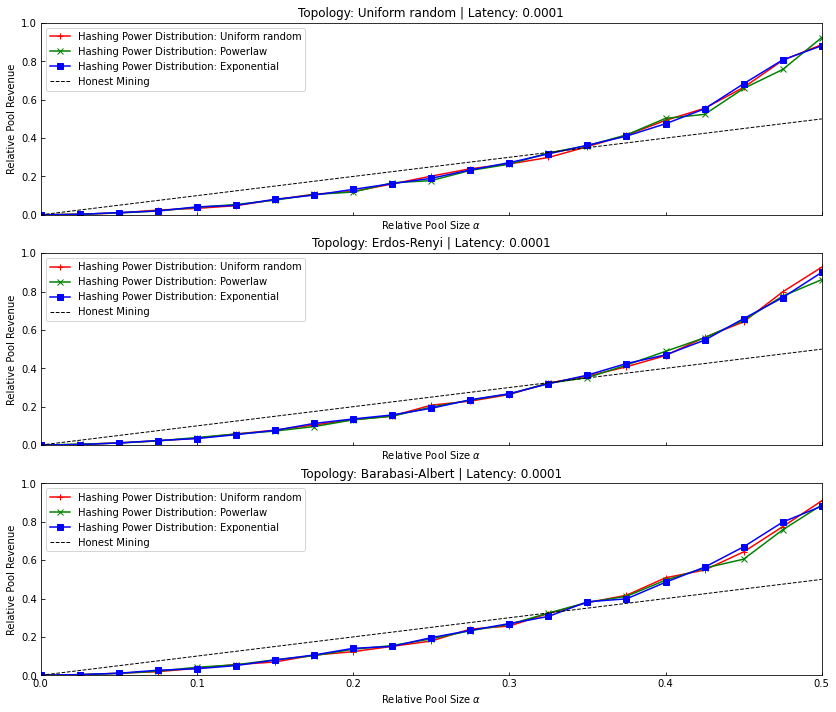

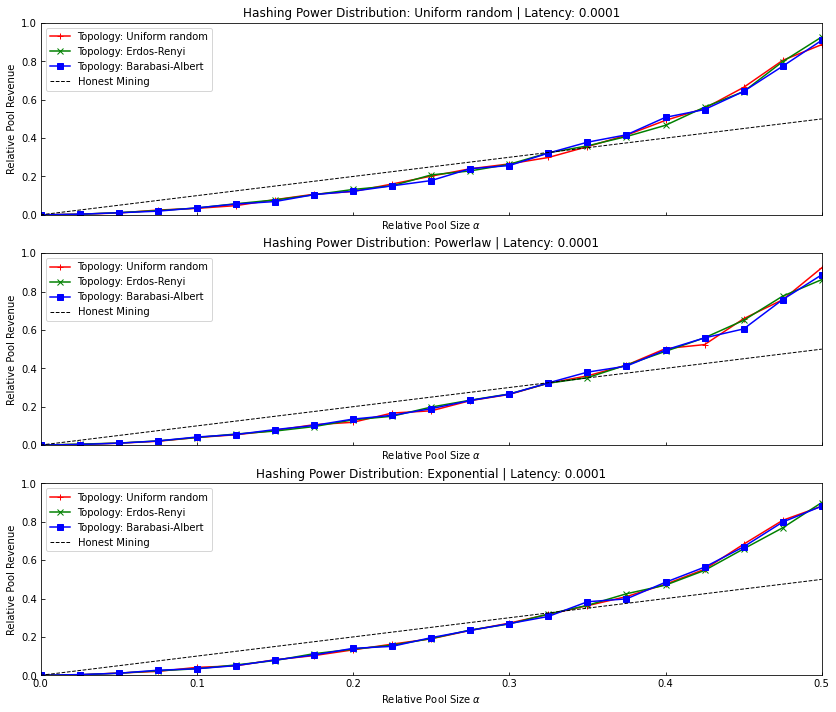

In [10]:
multi_plot(topologies, hash_distributions, to_save=False)
multi_plot(hash_distributions, topologies, to_save=False)

## Plot 1 
### MSB against Alpha

In [11]:
def msb_plot(iterator1, iterator2, to_save=False):
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(
        14, 12), sharex=True, sharey=True)
    marker_list = ["+", "x", "s", "o"]
    color_list = ["red", "green", "blue", "orange"]
    topology_names = ["Uniform random", "Erdos-Renyi", "Barabasi-Albert"]
    hash_distr_names = ["Uniform random", "Powerlaw", "Exponential"]
    unique_gammas = data["Gamma"].unique()

    header_is_topology = True if iterator1 == topologies else False

    for (ii, iter1) in enumerate(iterator1):
        for (jj, iter2) in enumerate(iterator2):

            # setup
            legend_label = f"Hashing Power Distribution: {hash_distr_names[jj]}" if header_is_topology else f"Topology: {topology_names[jj]}"
            title = f"MSB Plot (Topology: {topology_names[ii]}" if header_is_topology else f"MSB Plot (Hashing Power Distribution: {hash_distr_names[ii]})"
            title += f" | Latency: {np.round(unique_gammas[0],4)})"

            if header_is_topology:
                filt = data[
                    (data["Topology"] == iter1) &
                    (data["HashingPowerDistribution"] == iter2) &
                    (data["Gamma"] == unique_gammas[0]) &
                    (data["CentralityMeasure"] == "RANDOM")
                ]
            else:
                filt = data[
                    (data["Topology"] == iter2) &
                    (data["HashingPowerDistribution"] == iter1) &
                    (data["Gamma"] == unique_gammas[0]) &
                    (data["CentralityMeasure"] == "RANDOM")
                ]

            axs[ii].plot(
                filt["Alpha"],
                filt["SelfishMSB"],
                label=f"Selfish Miner | {legend_label}",
                marker=marker_list[jj],
                color=color_list[jj],
                linestyle="-")

            axs[ii].plot(
                filt["Alpha"],
                filt["HonestMSB"],
                label=f"Honest Miner | {legend_label}",
                marker=marker_list[jj],
                color=color_list[jj],
                linestyle="--",
                linewidth=0.8)
            axs[ii].set_xlabel(r"Relative Pool Size $\alpha$")
            axs[ii].set_ylabel("MSB value")

        # # add significance level (MSB=2) line
        axs[ii].plot(
            [0, 0.5], [2, 2], label=r"$MSB = 2$", color="black", linestyle="dotted", linewidth=1.0,
        )
        axs[ii].set_xlim(0, 0.5)
        axs[ii].set_title(title)
        axs[ii].tick_params(direction="in")
        axs[ii].legend(loc='right')

    if to_save:
        # save fig
        fig_filename = f"MSB1_topologies_{fname[:-4]}.png" if header_is_topology else f"MSB1_hash_distributions_{fname[:-4]}.png"
        path = parent_dir + f"/notebooks/figures/{fig_filename}"
        plt.savefig(path, bbox_inches="tight")
    else:
        plt.show()

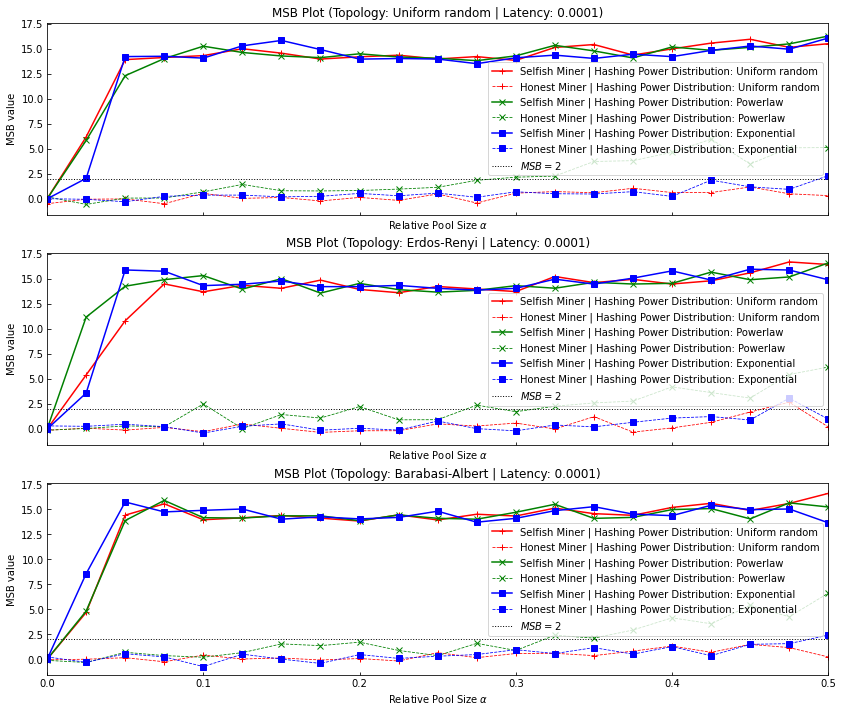

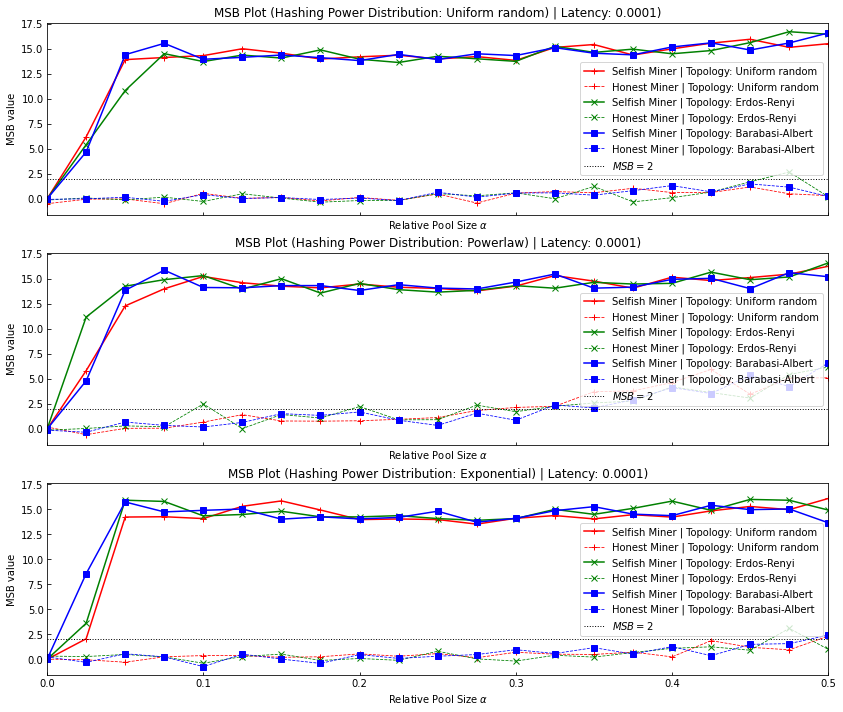

In [12]:
msb_plot(topologies, hash_distributions, to_save=False)
msb_plot(hash_distributions, topologies, to_save=False)

## Plot 2
### Selfish MSB against Relative Selfish Revenue

In [13]:
def msb_plot2(iterator1, iterator2, to_save=False):
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(
        14, 12), sharex=True, sharey=True)
    marker_list = ["+", "x", "s", "o"]
    color_list = ["red", "green", "blue", "orange"]
    topology_names = ["Uniform random", "Erdos-Renyi", "Barabasi-Albert"]
    hash_distr_names = ["Uniform random", "Powerlaw", "Exponential"]
    unique_gammas = data["Gamma"].unique()

    header_is_topology = True if iterator1 == topologies else False

    for (ii, iter1) in enumerate(iterator1):
        for (jj, iter2) in enumerate(iterator2):

            # setup
            legend_label = f"Hashing Power Distribution: {hash_distr_names[jj]}" if header_is_topology else f"Topology: {topology_names[jj]}"
            title = f"MSB Plot (Topology: {topology_names[ii]})" if header_is_topology else f"MSB Plot (Hashing Power Distribution: {hash_distr_names[ii]})"
            title += f" | Latency: {np.round(unique_gammas[0],4)}"

            if header_is_topology:
                filt = data[
                    (data["Topology"] == iter1) &
                    (data["HashingPowerDistribution"] == iter2) &
                    (data["Gamma"] == unique_gammas[0]) &
                    (data["CentralityMeasure"] == "RANDOM")
                ]
            else:
                filt = data[
                    (data["Topology"] == iter2) &
                    (data["HashingPowerDistribution"] == iter1) &
                    (data["Gamma"] == unique_gammas[0]) &
                    (data["CentralityMeasure"] == "RANDOM")
                ]

            axs[ii].plot(
                filt["RelativeSelfishRevenue"],
                filt["SelfishMSB"],
                label=f"{legend_label}",
                marker=marker_list[jj],
                color=color_list[jj],
                linestyle="-")

            # # # axs[ii].plot(
            # # #     [1-i for i in filt["RelativeSelfishRevenue"]],
            # # #     filt["HonestMSB"],
            # # #     label=f"Honest Miner | {legend_label}",
            # # #     marker=marker_list[jj],
            # # #     color=color_list[jj],
            # # #     linestyle="--",
            # # #     linewidth=0.8)
            
            
            axs[ii].set_xlabel(r"Relative Selfish Revenue")
            axs[ii].set_ylabel("Selfish MSB Value")
            axs[ii].set_xticks(np.linspace(0,1,11))

        # # add significance level (MSB=2) line
        axs[ii].plot(
            [0, 1], [2, 2], label=r"$MSB = 2$", color="black", linestyle="dotted", linewidth=1.0,
        )
        axs[ii].set_xlim(0, 1)
        axs[ii].set_title(title)
        axs[ii].tick_params(direction="in")
        axs[ii].legend(loc='right')

    if to_save:
        # save fig
        fig_filename = f"MSB2_topologies_{fname[:-4]}.png" if header_is_topology else f"MSB2_hash_distributions_{fname[:-4]}.png"
        path = parent_dir + f"/notebooks/figures/{fig_filename}"
        plt.savefig(path, bbox_inches="tight")
    else:
        plt.show()

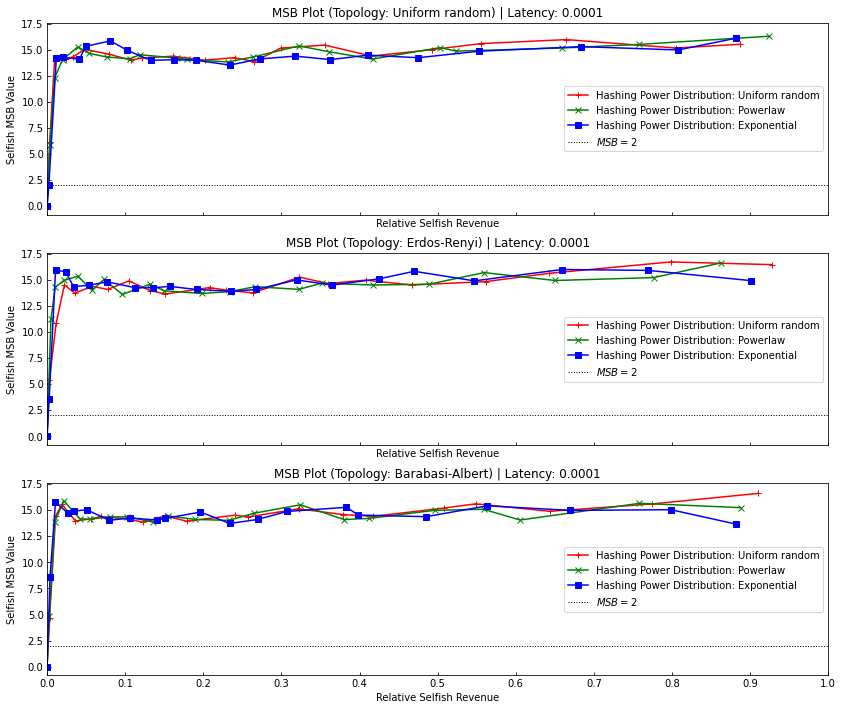

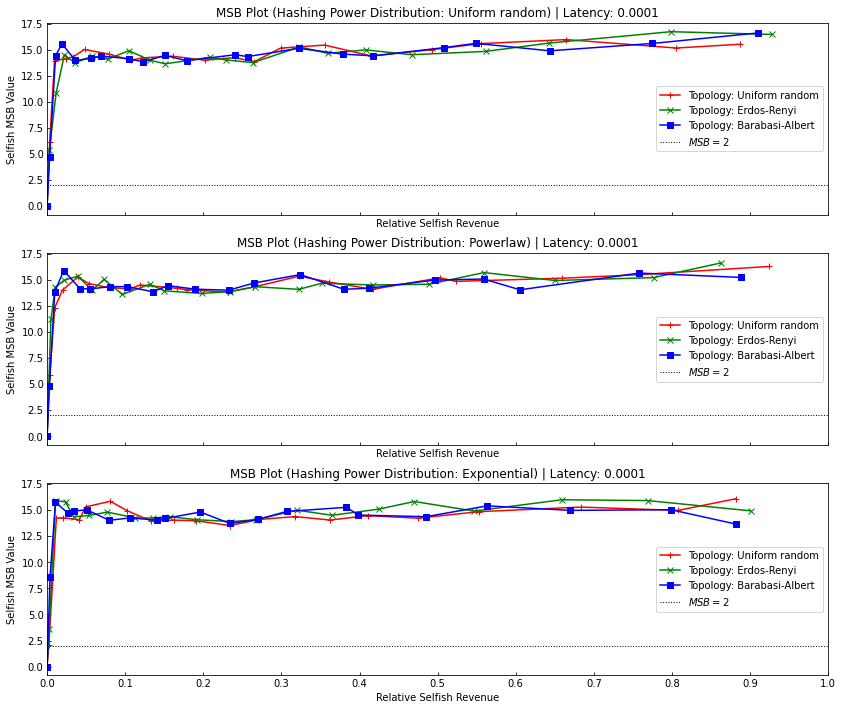

In [14]:
msb_plot2(topologies, hash_distributions, to_save=False)
msb_plot2(hash_distributions, topologies, to_save=False)

## Plot 3
### Hand-Picking Selfish Nodes

In [15]:
def multi_plot_centrality(iterator1, iterator2, to_save=False):
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(
        14, 12), sharex=True, sharey=True)
    marker_list = ["+", "x", "s", "o"]
    color_list = ["red", "green", "blue", "orange"]
    topology_names = ["Uniform random", "Erdos-Renyi", "Barabasi-Albert"]
    hash_distr_names = ["Uniform random", "Powerlaw", "Exponential"]
    unique_gammas = data["Gamma"].unique()

    header_is_topology = True if iterator1 == topologies else False

    for (ii, iter1) in enumerate(iterator1):
        for (jj, iter2) in enumerate(iterator2):

            # setup
            legend_label = f"Hashing Power Distribution: {hash_distr_names[jj]}" if header_is_topology else f"Topology: {topology_names[jj]}"
            title = f"Topology: {topology_names[ii]}" if header_is_topology else f"Hashing Power Distribution: {hash_distr_names[ii]}"
            title += f" | Latency: {np.round(unique_gammas[0],4)}"

            for centrality in centrality_measures:
                if header_is_topology:
                    filt = data[
                        (data["Topology"] == iter1) &
                        (data["HashingPowerDistribution"] == iter2) &
                        (data["Gamma"] == unique_gammas[0]) &
                        (data["CentralityMeasure"] == centrality)
                    ]
                else:
                    filt = data[
                        (data["Topology"] == iter2) &
                        (data["HashingPowerDistribution"] == iter1) &
                        (data["Gamma"] == unique_gammas[0]) &
                        (data["CentralityMeasure"] == centrality)
                    ]

                axs[ii].plot(
                    filt["Alpha"],
                    filt["RelativeSelfishRevenue"],
                    label=legend_label,
                    marker=marker_list[jj],
                    color=color_list[jj],
                    linestyle="-")
                axs[ii].set_xlabel(r"Relative Pool Size $\alpha$")
                axs[ii].set_ylabel("Relative Pool Revenue")

        axs[ii].plot(
            [0, 0.5],
            [0, 0.5],
            label="Honest Mining",
            color="black",
            linestyle="--",
            linewidth=1.0,
        )
        axs[ii].set_xlim(0, 0.5)
        axs[ii].set_ylim(0, 1)
        axs[ii].set_title(title)
        axs[ii].tick_params(direction="in")
        axs[ii].legend(loc='upper left')

    if to_save:
        # save fig
        fig_filename = f"RelativeRevenue-Alpha_topologies_{fname[:-4]}.png" if header_is_topology else f"RR_hash_distributions_{fname[:-4]}.png"
        path = parent_dir + f"/notebooks/figures/{fig_filename}"
        plt.savefig(path, bbox_inches="tight")
    else:
        plt.show()

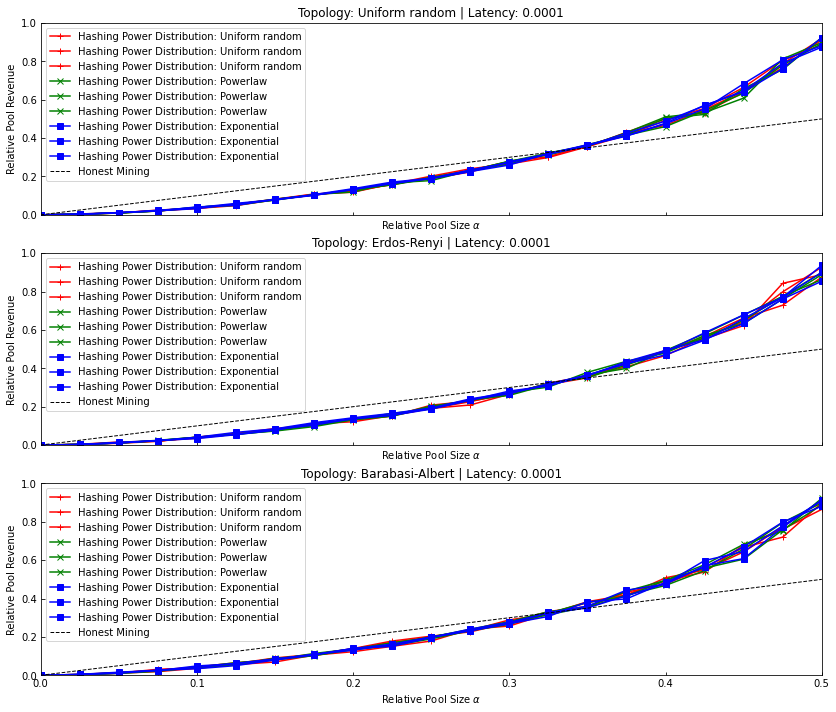

In [16]:
multi_plot_centrality(topologies, hash_distributions, to_save=False)

In [17]:
def simple_plot(topology, hash_distribution, to_save=False):

    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(
        12, 8), sharex=True, sharey=True)
    marker_list = ["+", "x", "s", "o"]
    color_list = ["red", "green", "blue", "orange"]
    unique_gammas = data["Gamma"].unique()

    for (ii, centrality_measure) in enumerate(centrality_measures):
        filt = data[
            (data["Topology"] == topology) & 
            (data["HashingPowerDistribution"] == hash_distribution) & 
            (data["Gamma"] == unique_gammas[15]) &
            (data["CentralityMeasure"] == centrality_measure)]

        axs.plot(
            filt["Alpha"],
            filt["RelativeSelfishRevenue"],
            label=f"centrality measure: {centrality_measure}",
            marker=marker_list[ii],
            color=color_list[ii],
            linestyle="-")
        axs.set_xlabel(r"Relative Pool Size $\alpha$")
        axs.set_ylabel("Relative Pool Revenue")

    axs.plot(
        [0, 0.5],
        [0, 0.5],
        label="Honest Mining",
        color="black",
        linestyle="--",
        linewidth=1.0,
    )
    axs.set_xlim(0, 0.5)
    axs.set_ylim(0, 1)
    axs.set_title(f"Handpicking Selfish Nodes (topology: {topology} | hashing power distribution: {hash_distribution})")
    axs.tick_params(direction="in")
    axs.legend(loc='upper left')


    if to_save:
        # save fig
        fig_filename = f"Handpicked_SelfishNodes_{topology}_{hash_distribution}_{fname[:-4]}.png"
        path = parent_dir + f"/notebooks/figures/{fig_filename}"
        plt.savefig(path, bbox_inches="tight")
    else:
        plt.show()

    # save fig
    plt.show()

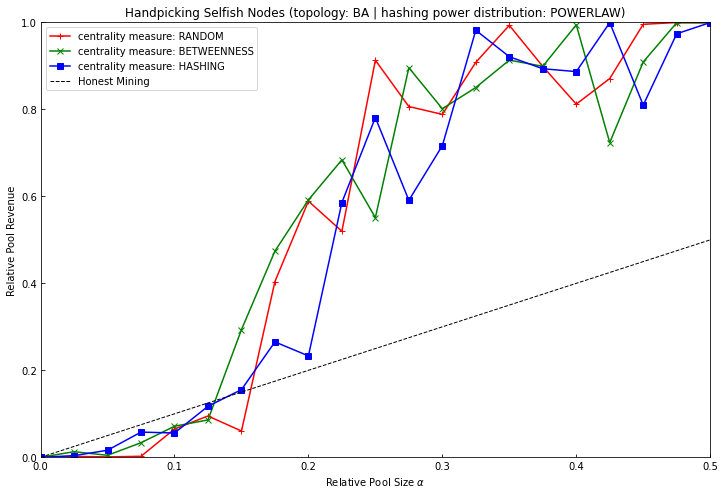

In [18]:
simple_plot(topology="BA", hash_distribution="POWERLAW", to_save=True)

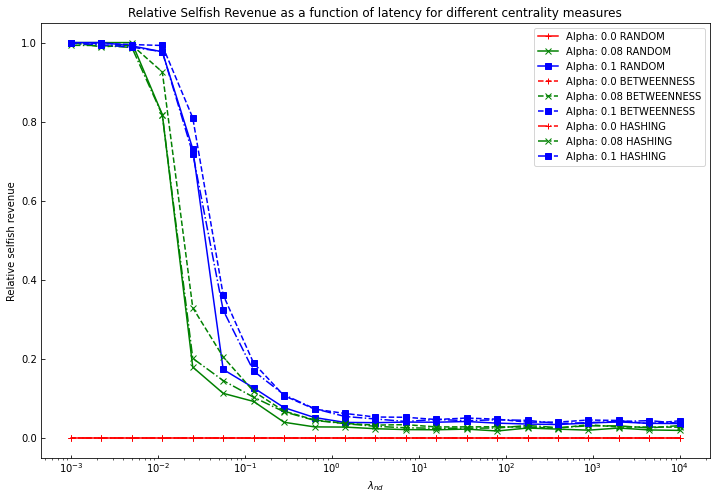

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)

marker_list = ["+", "x", "s", "o"]
color_list = ["red", "green", "blue", "orange"]

alpha_values = [alphas[0], alphas[3], alphas[4]]

linestyles = ["-", "--", "dashdot"]

for (index, cmeasure) in enumerate(centrality_measures):

    for (i, alpha) in enumerate(alpha_values):
        filt = data[
            (data["Topology"] == "BA") & 
            (data["HashingPowerDistribution"] == "UNIFORM") & 
            (data["CentralityMeasure"] == cmeasure) &
            (data["Alpha"] == alpha)]
        axs.plot(
            1/filt["Gamma"],
            filt["RelativeSelfishRevenue"],
            label=f"Alpha: {np.round(alpha, 2)} " + cmeasure,
            color=color_list[i],
            marker=marker_list[i],
            linestyle=linestyles[index]
        )
axs.set_xscale("log")
axs.set_title("Relative Selfish Revenue as a function of latency for different centrality measures")
axs.set_xlabel(r"$\lambda_{nd}$")
axs.set_ylabel("Relative selfish revenue")
axs.tick_params(direction="in")
axs.legend()
plt.show()

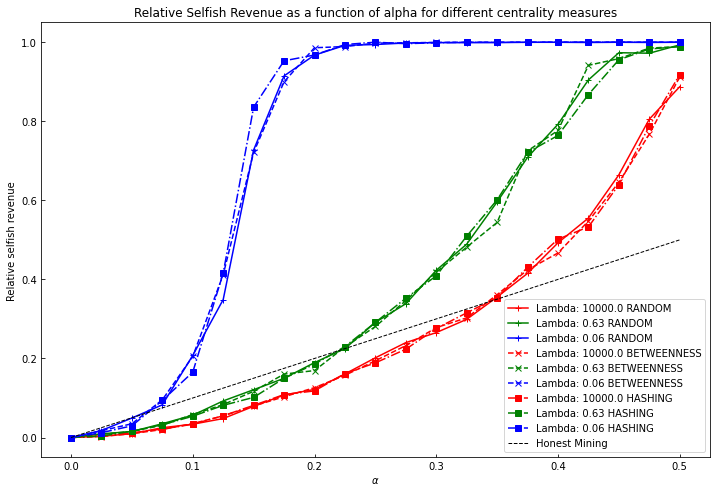

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)

marker_list = ["+", "x", "s", "o"]
color_list = ["red", "green", "blue", "orange"]

gamma_values = [gammas[0], gammas[12], gammas[15]]

linestyles = ["-", "--", "dashdot"]

for (index, cmeasure) in enumerate(centrality_measures):

    for (i, gamma) in enumerate(gamma_values):
        filt = data[
            (data["Topology"] == "UNIFORM") & 
            (data["HashingPowerDistribution"] == "UNIFORM") & 
            (data["CentralityMeasure"] == cmeasure) &
            (data["Gamma"] == gamma)]
        axs.plot(
            filt["Alpha"],
            filt["RelativeSelfishRevenue"],
            label=f"Lambda: {np.round(1/gamma, 2)} " + cmeasure,
            color=color_list[i],
            marker=marker_list[index],
            linestyle=linestyles[index]
        )
axs.plot(
    [0, 0.5],
    [0, 0.5],
    label="Honest Mining",
    color="black",
    linestyle="--",
    linewidth=1.0,
    )
axs.set_title("Relative Selfish Revenue as a function of alpha for different centrality measures")
axs.set_xlabel(r"$\alpha$")
axs.set_ylabel("Relative selfish revenue")
axs.tick_params(direction="in")
axs.legend()
plt.show()

## MSB Plot 3

### Simple Plot MSB

In [25]:
def simple_plot_MSB(topology, hash_distribution, to_save=False):

    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(
        12, 8), sharex=True, sharey=True)
    marker_list = ["+", "x", "s", "o"]
    color_list = ["red", "green", "blue", "orange"]
    unique_gammas = data["Gamma"].unique()
    filt = data[
        (data["Topology"] == topology) & 
        (data["HashingPowerDistribution"] == hash_distribution) & 
        (data["Gamma"] == unique_gammas[0]) &
        (data["CentralityMeasure"] == "RANDOM")
        ]
    axs.plot(
        filt["Alpha"],
        filt["SelfishMSBTessone"],
        label=f"Selfish MSB Tessone",
        marker=marker_list[0],
        color=color_list[0],
        linestyle="-"
        )
    axs.plot(
        filt["Alpha"],
        filt["SelfishMSB"],
        label=f"Selfish MSB",
        marker=marker_list[1],
        color=color_list[1],
        linestyle="-"
        )

    axs.set_xlabel(r"Relative Pool Size $\alpha$")
    axs.set_ylabel("MSB value")

    # add significance level (MSB=2) line
    axs.plot( 
        [0, 1], [2, 2], label=r"$MSB = 2$", color="black", linestyle="dotted", linewidth=1.0,
        )
    axs.set_xlim(0, 0.5)
    axs.set_title("MSB Plot")
    axs.tick_params(direction="in")
    axs.legend(loc='lower left')
    
    # save fig
    plt.show()

In [26]:
simple_plot_MSB("UNIFORM", "UNIFORM", to_save=False)

KeyError: 'SelfishMSBTessone'

# New version of plots

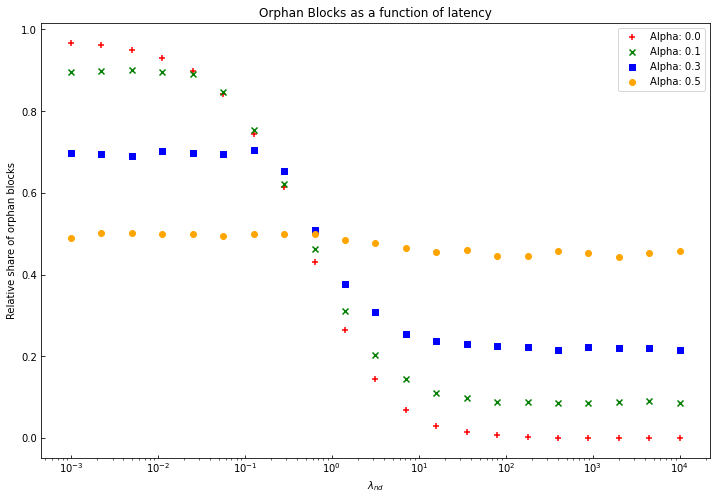

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)

marker_list = ["+", "x", "s", "o"]
color_list = ["red", "green", "blue", "orange"]

alpha_values = [alphas[0], alphas[4], alphas[12], alphas[20]]

for (i, alpha) in enumerate(alpha_values):
    filt = data[
        (data["Topology"] == "BA") & 
        (data["HashingPowerDistribution"] == "UNIFORM") & 
        (data["CentralityMeasure"] == "RANDOM") &
        (data["Alpha"] == alpha)]
    axs.scatter(
        1/filt["Gamma"],
        filt["OrphanBlocks"]/filt["TotalBlocks"],
        label=f"Alpha: {np.round(alpha, 2)}",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="-"
    )
axs.set_xscale("log")
axs.set_title("Orphan Blocks as a function of latency")
axs.set_xlabel(r"$\lambda_{nd}$")
axs.set_ylabel("Relative share of orphan blocks")
axs.tick_params(direction="in")
axs.legend()
plt.show()

In [28]:
gammas
lambdas = 1/ gammas
print(gammas)
print(lambdas)

[1.00000000e-04 2.23872114e-04 5.01187234e-04 1.12201845e-03
 2.51188643e-03 5.62341325e-03 1.25892541e-02 2.81838293e-02
 6.30957344e-02 1.41253754e-01 3.16227766e-01 7.07945784e-01
 1.58489319e+00 3.54813389e+00 7.94328235e+00 1.77827941e+01
 3.98107171e+01 8.91250938e+01 1.99526231e+02 4.46683592e+02
 1.00000000e+03]
[1.00000000e+04 4.46683592e+03 1.99526231e+03 8.91250938e+02
 3.98107171e+02 1.77827941e+02 7.94328235e+01 3.54813389e+01
 1.58489319e+01 7.07945784e+00 3.16227766e+00 1.41253754e+00
 6.30957344e-01 2.81838293e-01 1.25892541e-01 5.62341325e-02
 2.51188643e-02 1.12201845e-02 5.01187234e-03 2.23872114e-03
 1.00000000e-03]


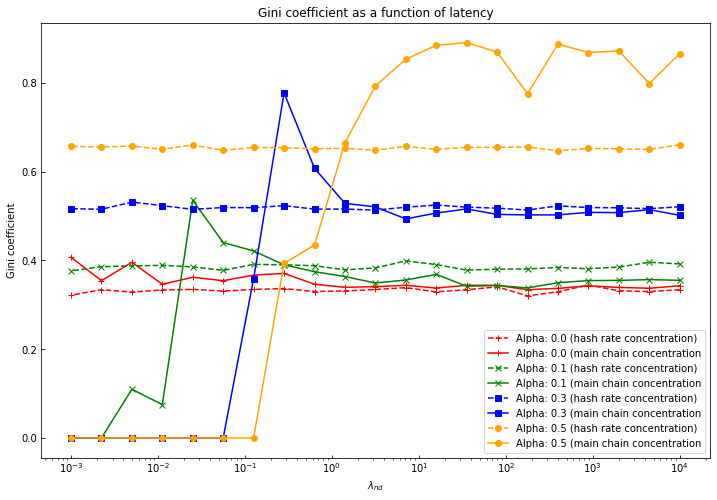

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)

marker_list = ["+", "x", "s", "o"]
color_list = ["red", "green", "blue", "orange"]

alpha_values = [alphas[0], alphas[4], alphas[12], alphas[20]]

for (i, alpha) in enumerate(alpha_values):
    filt = data[
        (data["Topology"] == "BA") & 
        (data["HashingPowerDistribution"] == "UNIFORM") & 
        (data["CentralityMeasure"] == "RANDOM") &
        (data["Alpha"] == alpha)]
    axs.plot(
        1/filt["Gamma"],
        filt["GiniHashrate"],
        label=f"Alpha: {alpha} (hash rate concentration)",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="--"
    )
    axs.plot(
        1/filt["Gamma"],
        filt["GiniMainchain"],
        label=f"Alpha: {alpha} (main chain concentration",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="-"
    )
axs.set_xscale("log")
axs.set_title("Gini coefficient as a function of latency")
axs.set_xlabel(r"$\lambda_{nd}$")
axs.set_ylabel("Gini coefficient")
axs.tick_params(direction="in")
axs.legend()
plt.show()

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)

marker_list = ["+", "x", "s", "o"]
color_list = ["red", "green", "blue", "orange"]

alpha_values = [alphas[0], alphas[4], alphas[12], alphas[20]]

for (i, alpha) in enumerate(alpha_values):
    filt = data[
        (data["Topology"] == "UNIFORM") & 
        (data["HashingPowerDistribution"] == "UNIFORM") & 
        (data["CentralityMeasure"] == "RANDOM") &
        (data["Alpha"] == alpha)]
    axs.plot(
        1/filt["Gamma"],
        filt["SelfishMSBTessone"],
        label=f"Alpha: {alpha} (selfish miner)",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="-"
    )
    axs.plot(
        1/filt["Gamma"],
        filt["HonestMSB"],
        label=f"Alpha: {alpha} (honest miner)",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="--"
    )
axs.plot(
    [0.001, 10000], [2, 2], label=r"$MSB = 2$", color="black", linestyle="dotted", linewidth=1.0,
    )
axs.set_xscale("log")
axs.set_title("MSB as a function of latency")
axs.set_xlabel(r"$\lambda_{nd}$")
axs.set_ylabel("MSB value")
axs.tick_params(direction="in")
axs.legend()
plt.show()

KeyError: 'SelfishMSBTessone'

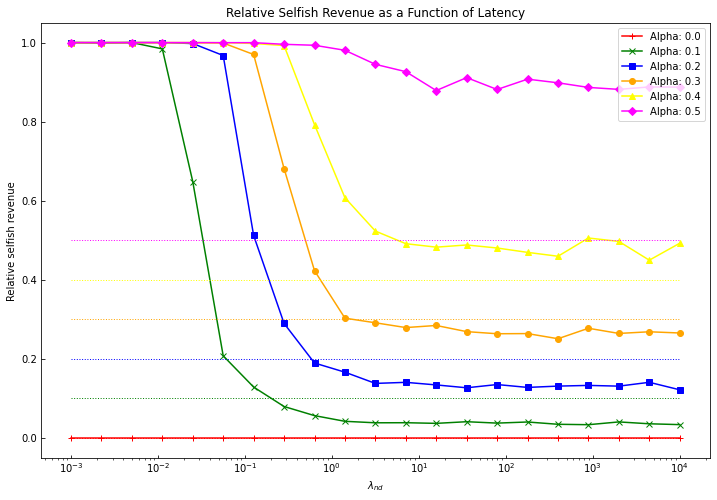

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)

marker_list = ["+", "x", "s", "o", "^", "D"]
color_list = ["red", "green", "blue", "orange", "yellow", "magenta"]

alpha_values = [alphas[0], alphas[4], alphas[8], alphas[12], alphas[16], alphas[20]]

for (i, alpha) in enumerate(alpha_values):
    filt = data[
        (data["Topology"] == "UNIFORM") & 
        (data["HashingPowerDistribution"] == "UNIFORM") & 
        (data["CentralityMeasure"] == "RANDOM") &
        (data["Alpha"] == alpha)]
    axs.plot(
        1/filt["Gamma"],
        filt["RelativeSelfishRevenue"],
        label=f"Alpha: {np.round(alpha,2)}",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="-"
    )
    axs.plot(
    [0.001, 10000], [alpha, alpha], color=color_list[i], linestyle="dotted", linewidth=1.0,
    )
axs.set_xscale("log")

axs.set_title("Relative Selfish Revenue as a Function of Latency")
axs.set_xlabel(r"$\lambda_{nd}$")
axs.set_ylabel("Relative selfish revenue")
axs.tick_params(direction="in")
axs.legend()
plt.show()

In [32]:
# latency: orphan block rate, gini index, msb, relative selfish revenue  

In [33]:
# alpha: the same with a couple of 

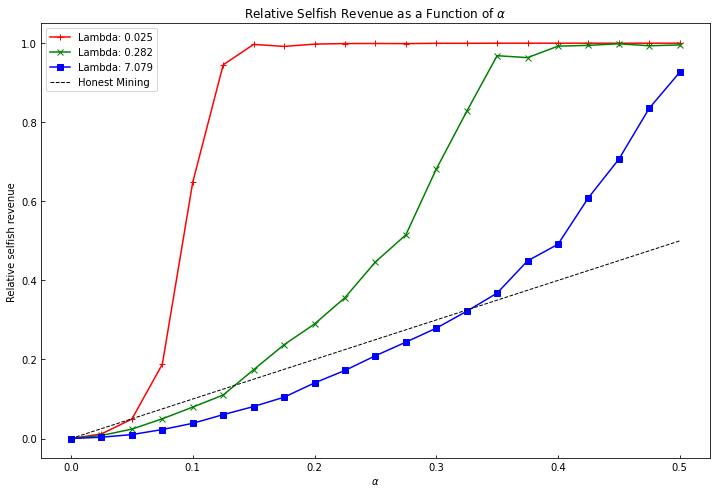

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)

marker_list = ["+", "x", "s", "o"]
color_list = ["red", "green", "blue", "orange"]

gamma_values = [gammas[16], gammas[13], gammas[9]]

for (i, gamma) in enumerate(gamma_values):
    filt = data[
        (data["Topology"] == "UNIFORM") & 
        (data["HashingPowerDistribution"] == "UNIFORM") & 
        (data["CentralityMeasure"] == "RANDOM") &
        (data["Gamma"] == gamma)]
    axs.plot(
        filt["Alpha"],
        filt["RelativeSelfishRevenue"],
        label=f"Lambda: {np.round(1/gamma,3)}",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="-",
    )
axs.plot(
        [0, 0.5],
        [0, 0.5],
        label="Honest Mining",
        color="black",
        linestyle="--",
        linewidth=1.0,
    )
# axs.set_xscale("log")
axs.set_title(r"Relative Selfish Revenue as a Function of $\alpha$")
axs.set_xlabel(r"$\alpha$")
axs.set_ylabel("Relative selfish revenue")
axs.tick_params(direction="in")
axs.legend()
plt.show()

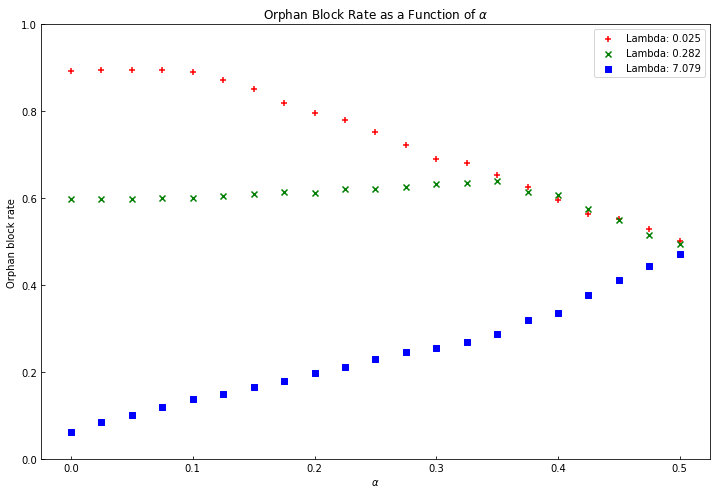

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)

marker_list = ["+", "x", "s", "o"]
color_list = ["red", "green", "blue", "orange"]

gamma_values = [gammas[16], gammas[13], gammas[9]]

for (i, gamma) in enumerate(gamma_values):
    filt = data[
        (data["Topology"] == "UNIFORM") & 
        (data["HashingPowerDistribution"] == "UNIFORM") & 
        (data["CentralityMeasure"] == "RANDOM") &
        (data["Gamma"] == gamma)]
    axs.scatter(
        filt["Alpha"],
        filt["OrphanBlocks"]/filt["TotalBlocks"],
        label=f"Lambda: {np.round(1/gamma,3)}",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="-",
    )
axs.set_ylim(0,1)
axs.set_title(r"Orphan Block Rate as a Function of $\alpha$")
axs.set_xlabel(r"$\alpha$")
axs.set_ylabel("Orphan block rate")
axs.tick_params(direction="in")
axs.legend()
plt.show()

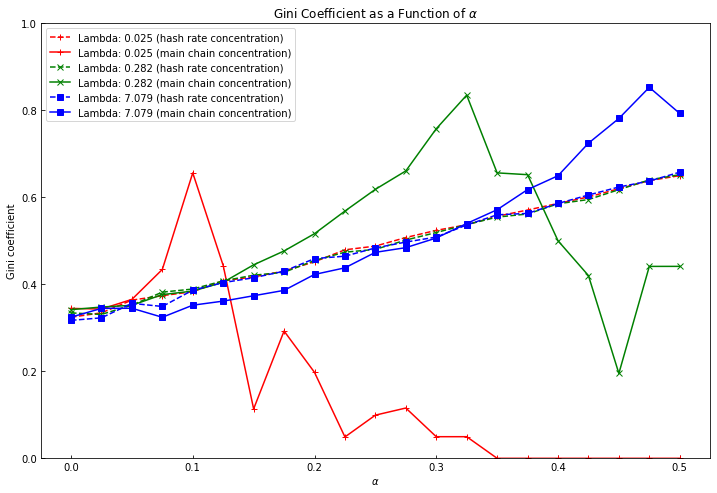

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)

marker_list = ["+", "x", "s", "o"]
color_list = ["red", "green", "blue", "orange"]

gamma_values = [gammas[16], gammas[13], gammas[9]]

for (i, gamma) in enumerate(gamma_values):
    filt = data[
        (data["Topology"] == "UNIFORM") & 
        (data["HashingPowerDistribution"] == "UNIFORM") & 
        (data["CentralityMeasure"] == "RANDOM") &
        (data["Gamma"] == gamma)]
    axs.plot(
        filt["Alpha"],
        filt["GiniHashrate"],
        label=f"Lambda: {np.round(1/gamma,3)} (hash rate concentration)",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="--"
    )
    axs.plot(
        filt["Alpha"],
        filt["GiniMainchain"],
        label=f"Lambda: {np.round(1/gamma,3)} (main chain concentration)",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="-"
    )
axs.set_ylim(0,1)
axs.set_title(r"Gini Coefficient as a Function of $\alpha$")
axs.set_xlabel(r"$\alpha$")
axs.set_ylabel("Gini coefficient")
axs.tick_params(direction="in")
axs.legend()
plt.show()

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)

marker_list = ["+", "x", "s", "o"]
color_list = ["red", "green", "blue", "orange"]

gamma_values = [gammas[16], gammas[13], gammas[9]]

for (i, gamma) in enumerate(gamma_values):
    filt = data[
        (data["Topology"] == "UNIFORM") & 
        (data["HashingPowerDistribution"] == "UNIFORM") & 
        (data["CentralityMeasure"] == "RANDOM") &
        (data["Gamma"] == gamma)]
    axs.plot(
        filt["Alpha"],
        filt["SelfishMSBTessone"],
        label=f"Lambda: {np.round(1/gamma,3)} (selfish miner)",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="-"
    )
    axs.plot(
        filt["Alpha"],
        filt["HonestMSB"],
        label=f"Lambda: {np.round(1/gamma,3)} (honest miner)",
        color=color_list[i],
        marker=marker_list[i],
        linestyle="--"
    )
axs.plot(
    [0, 0.5], [2, 2], label=r"$MSB = 2$", color="black", linestyle="dotted", linewidth=1.0,
    )

axs.set_title("MSB as a function of latency")
axs.set_xlabel(r"$\alpha}$")
axs.set_ylabel("MSB value")
axs.tick_params(direction="in")
axs.legend()
plt.show()

KeyError: 'SelfishMSBTessone'